<a href="https://colab.research.google.com/github/angelfox4/Pytorch_Introduction/blob/main/Multi_layer_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  다층 퍼셉트론으로 손글씨 분류하기

In [7]:
import torch
import torch.nn as nn
from torch import optim

%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits #0부터 9까지의 8*8 손필기 데이터셋
digits=load_digits() #1,979개의 이미지 데이터 로드

In [2]:
print(digits.images[0]) #8*8 이미지행렬

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print(digits.target[0]) #라벨

0


In [4]:
len(digits.images) #샘플의 개수

1797

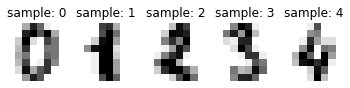

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

## 다층 퍼셉트론으로 분류기 만들기

In [6]:
#훈련데이터 지정
X=digits.data #이미지, N(샘플개수)*64형식으로 되어 있음
Y=digits.target #각 이미지에 대한 레이블

In [8]:
model=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [9]:
X=torch.tensor(X, dtype=torch.float32)
Y=torch.tensor(Y, dtype=torch.int64)

In [11]:
loss_fn=nn.CrossEntropyLoss() #이 비용함수는 소프트맥스 함수를 포함하고 있음
optimizer=optim.Adam(model.parameters()) #optimizer로 Adam을 사용함

In [12]:
losses=[]

for epoch in range(100):
  optimizer.zero_grad()
  y_pred=model(X) #forward 연산
  loss=loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 ==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))
  
  losses.append(loss.item())

Epoch    0/100 Cost: 2.542062
Epoch   10/100 Cost: 2.189538
Epoch   20/100 Cost: 1.967741
Epoch   30/100 Cost: 1.715410
Epoch   40/100 Cost: 1.422349
Epoch   50/100 Cost: 1.125995
Epoch   60/100 Cost: 0.851459
Epoch   70/100 Cost: 0.615265
Epoch   80/100 Cost: 0.448407
Epoch   90/100 Cost: 0.338694


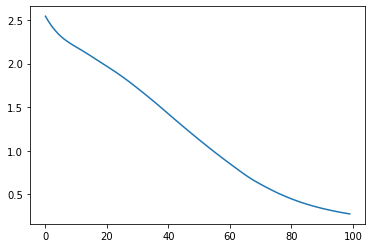

In [13]:
plt.plot(losses)